# GCAM production & land data analysis
* under various SSP assumptions
* the dynamics of production and available land (2020-2050) and (1996-2100)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette='pastel')
#sns.set(font_scale = 2)
import os
import numpy as np
from matplotlib.gridspec import GridSpec

In [47]:
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = MEDIUM_SIZE

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("legend",title_fontsize=SMALL_SIZE)

In [48]:


Rates = ['1_1_1_1','1_10_1_1','1_1_0.5_1','1_1_1_10','10_1_1_1']
Rate_legs = ['S0','S1','S2','S3','S4']

root = './Exps/'
data = pd.DataFrame()
for scenario in Scenarios:
    for year in Years:
        path = root + scenario + '/'
        data0 = pd.read_csv(path + 'all_rates_'+ year + '.csv').query('Rates == @Rates')
        data0['Exported(%)'] =  data0['Quantity_Z_Export_Import'] / data0['Total_production']
        data = pd.concat([data,data0])

data.query('Year == 1990 & Rates == @Rates[1]')
data

,Scenario,Year,Rates,OBJ_vaules,Cost_Farmers,Cost_Barges,Cost_Rails,Cost_Oceans,Total_production,Quantity_X_Facility,Quantity_X_Country_Stream,Quantity_X_Country_Rail,Quantity_Y_Stream_Export,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,Demand,Exported(%)
81,SSP1,1990,1_1_0.5_1,2136820959795,992802976557,164161284529,120875127168,855035882426,37099777725,11129933317,6758211499,13292982321,6758211499,13292982321,20051193821,9414617,0.540467
85,SSP1,1990,1_1_1_1,2240205731626,970486735031,203000775858,183149416358,879623115263,37099777725,11129933317,8218929356,11832264464,8218929356,11832264464,20051193821,9414617,0.540467
87,SSP1,1990,1_1_1_10,9770135510513,1104837813206,60165387585,444305268302,8156881352304,37099777725,11129933317,2207344884,17843848936,2207344884,17843848936,20051193821,9414617,0.540467
117,SSP1,1990,1_10_1_1,2372477405324,1189402812698,0,302711485615,876417417896,37099777725,11129933317,0,20051193821,0,20051193821,20051193821,9414617,0.540467
213,SSP1,1990,10_1_1_1,7215213115047,5339359454585,557352174270,154752642055,1159803155020,37099777725,4764017693,16801544912,9615564533,16801544912,9615564533,26417109445,9414617,0.712056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SSP5,2100,1_1_0.5_1,8112792868171,3575998302890,643224811811,455706250347,3264887612916,136697311478,41009193443,26482368993,50044645307,26482368993,50044645307,76527014300,4555876468,0.559828
85,SSP5,2100,1_1_1_1,8497257966779,3474337587990,818031082679,669883306744,3362030099160,136697311478,41009193443,32950034833,43576979467,32950034833,43576979467,76527014300,4555876468,0.559828
87,SSP5,2100,1_1_1_10,37252047116091,4016998316586,230179969931,1691542653272,31140350286096,136697311478,41009193443,8527968855,67999045444,8527968855,67999045444,76527014300,4555876468,0.559828
117,SSP5,2100,1_10_1_1,9020394329628,4349241767869,0,1147833672569,3350342998984,136697311478,41009193443,0,76527014300,0,76527014300,76527014300,4555876468,0.559828


# Load production data (2020-2050)

In [49]:
Scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
#Years = ['1990', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
subregions = ['MissppRN', 'OhioR', 'MissouriR', 'NelsonR', 'GreatLakes', 'ArkWhtRedR']
managements = ['IRR', 'RFD']
levels = ['hi', 'lo']

root = './GCAM_full/'

production = pd.read_csv(root + '20220421_gcam_production.csv').query('subregion in @subregions and scenario in @Scenarios')
land = pd.read_csv(root + '20220421_GCAM_totalarea.csv').query('subregion in @subregions and scenario in @Scenarios')

production

,scenario,time,subregion,management,level,1990,2005,2010,2015,2020,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Units
72,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,IRR,hi,0.284815,0.427582,0.463761,0.547850,0.598538,...,0.709258,0.706906,0.689168,0.675126,0.666865,0.657579,0.642477,0.620739,0.593780,Mt
73,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,IRR,lo,0.189877,0.285054,0.309174,0.365233,0.378912,...,0.397305,0.402567,0.404834,0.408017,0.411929,0.416232,0.419377,0.420369,0.419290,Mt
74,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,RFD,hi,0.630091,0.945929,1.025970,1.212000,1.425780,...,2.691160,2.681300,2.610000,2.552980,2.518640,2.479030,2.415850,2.326140,2.215570,Mt
75,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,RFD,lo,0.420060,0.630620,0.683979,0.807998,0.875307,...,1.146830,1.165720,1.179180,1.194710,1.210950,1.228880,1.244700,1.255210,1.260190,Mt
84,SSP1,date=2022-10-4T03:04:52-04:00,GreatLakes,IRR,hi,0.066038,0.099141,0.107529,0.127026,0.135518,...,0.154702,0.155772,0.154300,0.153590,0.154128,0.154585,0.153976,0.152114,0.149127,Mt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,SSP5,date=2022-10-4T03:04:52-04:00,NelsonR,RFD,lo,1.046390,1.570910,1.703830,2.012760,2.087640,...,1.882970,1.899180,1.912910,1.923640,1.943140,1.980800,2.031690,2.101230,2.218700,Mt
392,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,IRR,hi,0.047054,0.070640,0.076617,0.090510,0.097302,...,0.120609,0.122720,0.123727,0.125246,0.127188,0.129066,0.130426,0.130961,0.130107,Mt
393,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,IRR,lo,0.031400,0.047100,0.051100,0.060300,0.061000,...,0.054000,0.054600,0.055200,0.055800,0.056500,0.057500,0.058622,0.060007,0.061947,Mt
394,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,RFD,hi,4.750000,7.130000,7.730000,9.130000,10.600000,...,21.600000,22.000000,22.100000,22.400000,22.800000,23.100000,23.300000,23.400000,23.218200,Mt


In [50]:
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        for management in managements:
            for level in levels:
                #print(subregion, scenario, management, level)
                df = production.query('management == @management and level ==@level and scenario ==@scenario and subregion==@subregion')

data = df.loc[:,Years[0]:Years[-1]]
data.T

np.array(Years)

array(['2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype='<U4')

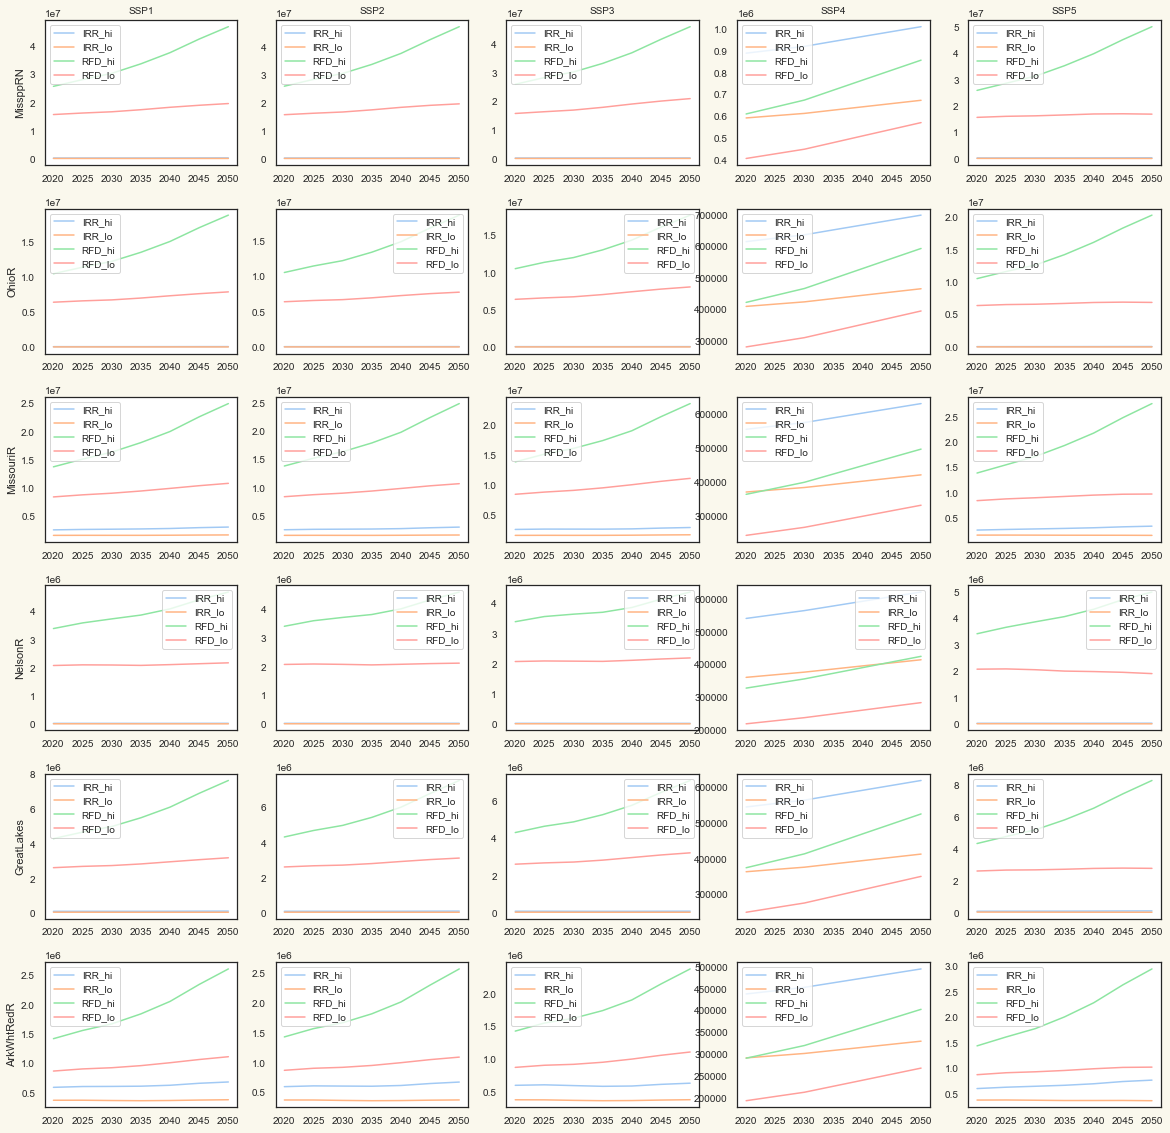

In [51]:
def plot(ax, y, label, ylabel=None, title=None):
    ax.plot(np.array(Years), y, label=label)
    ax.legend()
    ax.set_title(title)
    ax.set_ylabel(ylabel)    
        
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df = production.query('management == @management and level ==@level and scenario ==@scenario and subregion==@subregion')
                y = df.loc[:,Years[0]:Years[-1]].T*1e6
                #print(row,col,y)
                #print(df)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y, label=str(management)+'_'+str(level), ylabel=ylable, title=title)


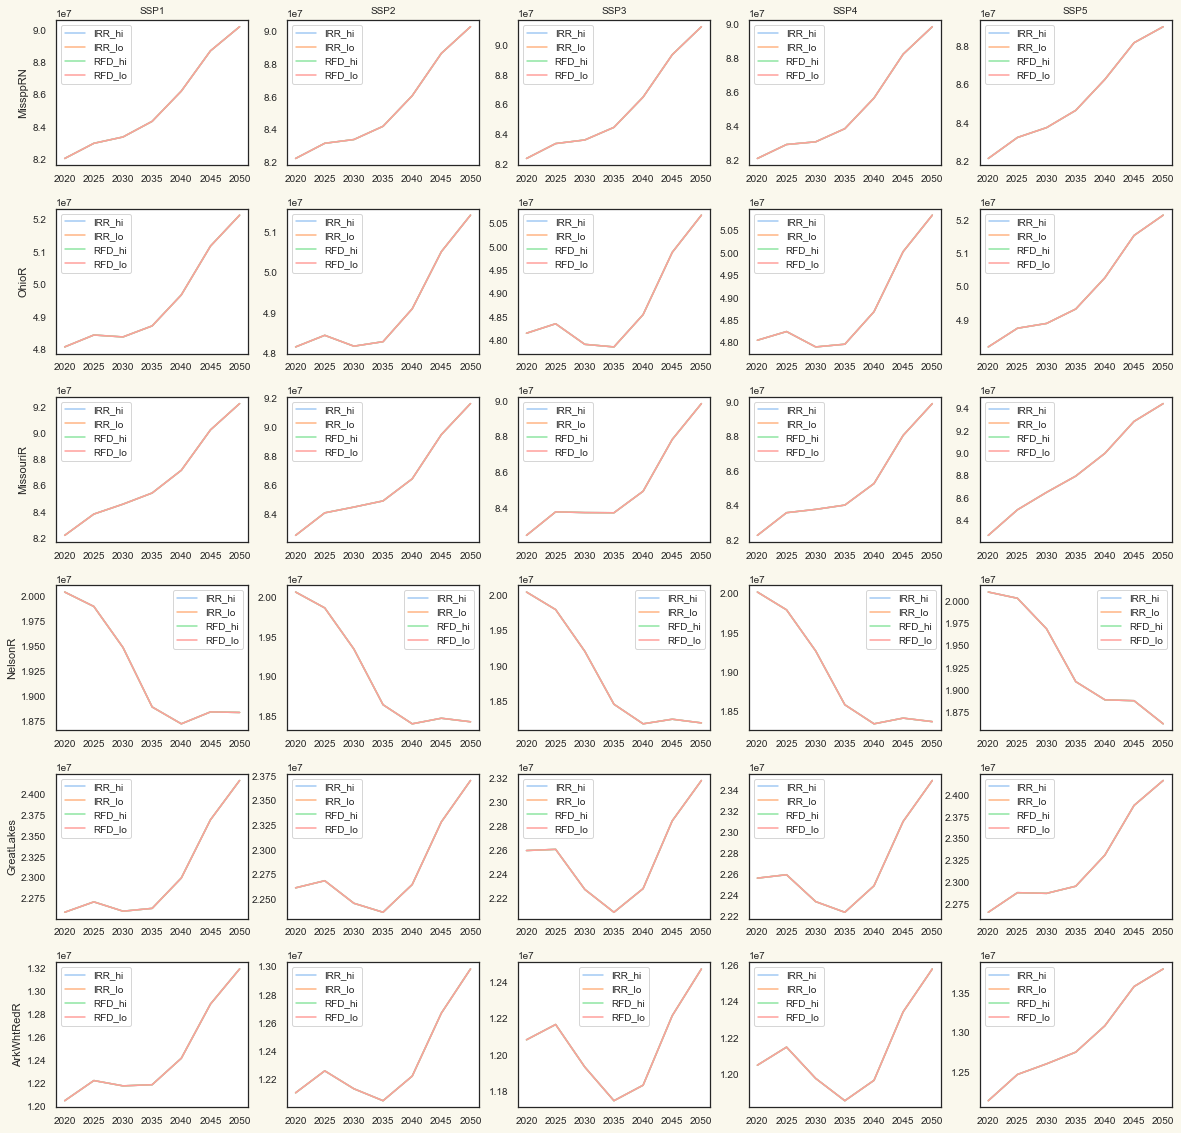

In [52]:
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df = land.query('scenario ==@scenario and subregion==@subregion')
                y = df.loc[:,Years[0]:Years[-1]].T*1e6
                #print(row,col,y)
                #print(df)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y, label=str(management)+'_'+str(level), ylabel=ylable, title=title)

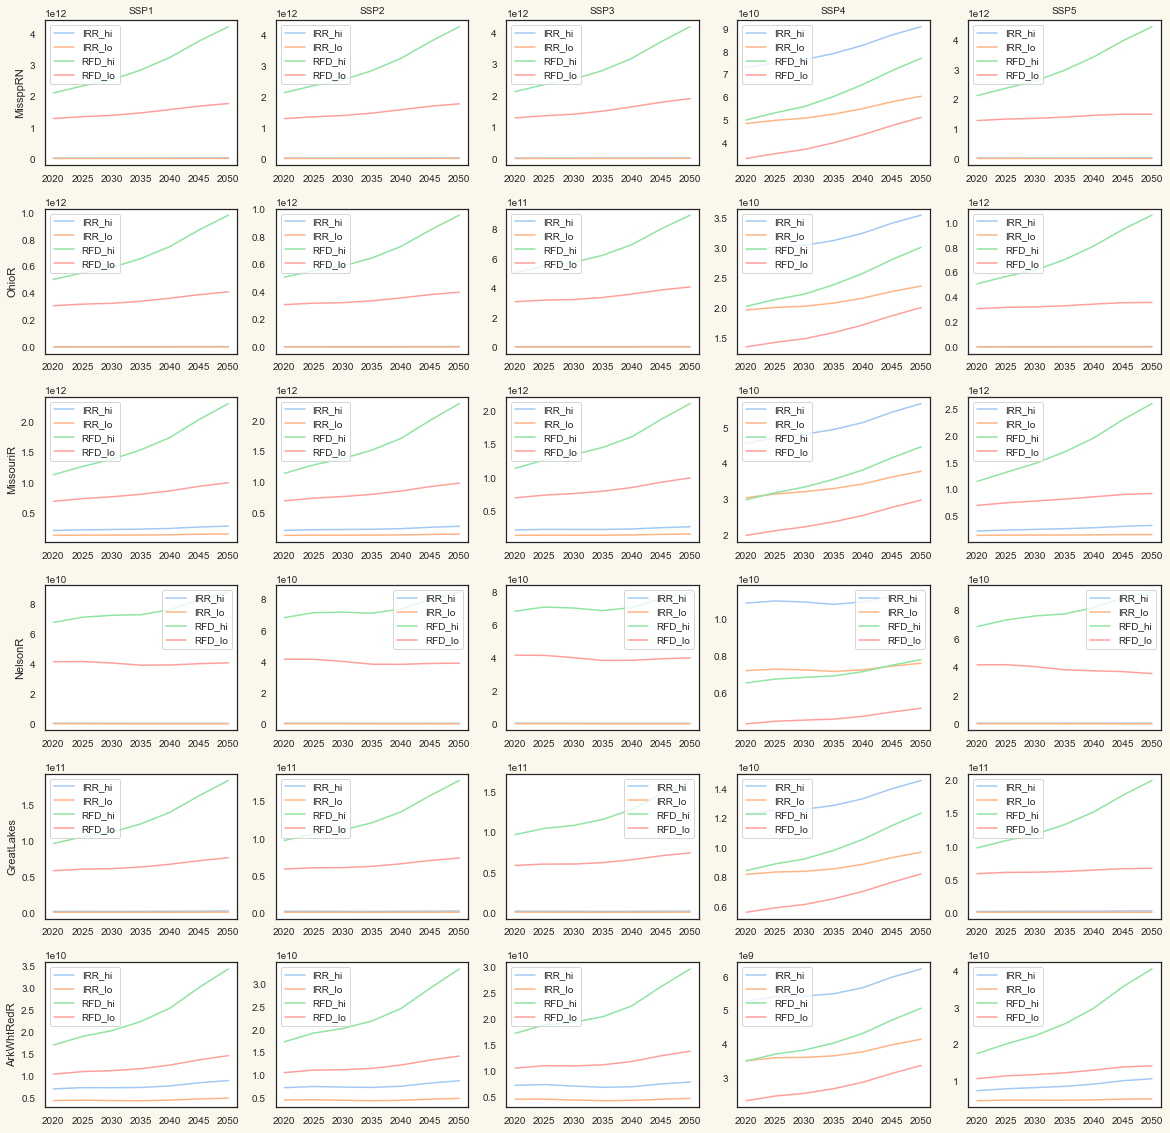

In [53]:
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df1 = production.query('management == @management and level ==@level and scenario ==@scenario and subregion==@subregion')
                df2 = land.query('scenario ==@scenario and subregion==@subregion')
                y1 = df1.loc[:,Years[0]:Years[-1]].T.to_numpy()*1e6
                y2 = df2.loc[:,Years[0]:Years[-1]].T.to_numpy()*1e3
                #print(row,col,y)
                #print(df)
                #print(y1,y2)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y1*y2, label=str(management)+'_'+str(level), ylabel=ylable, title=title)                

# Load data (1996-2100)

In [54]:
Scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
Years = ['1990', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
#Years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
subregions = ['MissppRN', 'OhioR', 'MissouriR', 'NelsonR', 'GreatLakes', 'ArkWhtRedR']
managements = ['IRR', 'RFD']
levels = ['hi', 'lo']

root = './GCAM_full/'

production = pd.read_csv(root + '20220421_gcam_production.csv').query('subregion in @subregions and scenario in @Scenarios')
land = pd.read_csv(root + '20220421_GCAM_totalarea.csv').query('subregion in @subregions and scenario in @Scenarios')

production

,scenario,time,subregion,management,level,1990,2005,2010,2015,2020,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Units
72,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,IRR,hi,0.284815,0.427582,0.463761,0.547850,0.598538,...,0.709258,0.706906,0.689168,0.675126,0.666865,0.657579,0.642477,0.620739,0.593780,Mt
73,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,IRR,lo,0.189877,0.285054,0.309174,0.365233,0.378912,...,0.397305,0.402567,0.404834,0.408017,0.411929,0.416232,0.419377,0.420369,0.419290,Mt
74,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,RFD,hi,0.630091,0.945929,1.025970,1.212000,1.425780,...,2.691160,2.681300,2.610000,2.552980,2.518640,2.479030,2.415850,2.326140,2.215570,Mt
75,SSP1,date=2022-10-4T03:04:52-04:00,ArkWhtRedR,RFD,lo,0.420060,0.630620,0.683979,0.807998,0.875307,...,1.146830,1.165720,1.179180,1.194710,1.210950,1.228880,1.244700,1.255210,1.260190,Mt
84,SSP1,date=2022-10-4T03:04:52-04:00,GreatLakes,IRR,hi,0.066038,0.099141,0.107529,0.127026,0.135518,...,0.154702,0.155772,0.154300,0.153590,0.154128,0.154585,0.153976,0.152114,0.149127,Mt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,SSP5,date=2022-10-4T03:04:52-04:00,NelsonR,RFD,lo,1.046390,1.570910,1.703830,2.012760,2.087640,...,1.882970,1.899180,1.912910,1.923640,1.943140,1.980800,2.031690,2.101230,2.218700,Mt
392,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,IRR,hi,0.047054,0.070640,0.076617,0.090510,0.097302,...,0.120609,0.122720,0.123727,0.125246,0.127188,0.129066,0.130426,0.130961,0.130107,Mt
393,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,IRR,lo,0.031400,0.047100,0.051100,0.060300,0.061000,...,0.054000,0.054600,0.055200,0.055800,0.056500,0.057500,0.058622,0.060007,0.061947,Mt
394,SSP5,date=2022-10-4T03:04:52-04:00,OhioR,RFD,hi,4.750000,7.130000,7.730000,9.130000,10.600000,...,21.600000,22.000000,22.100000,22.400000,22.800000,23.100000,23.300000,23.400000,23.218200,Mt


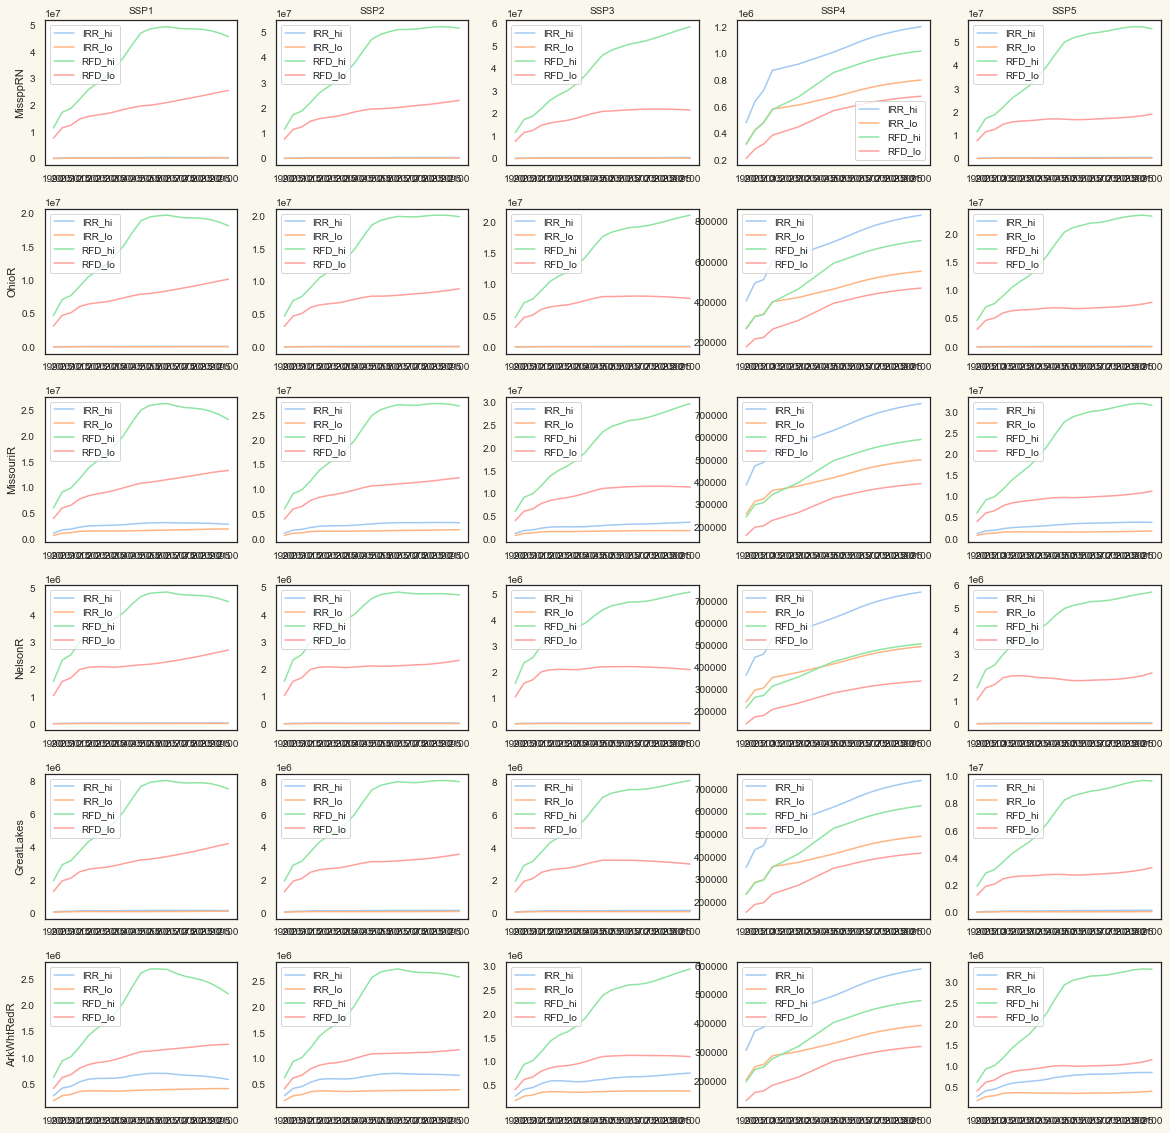

In [55]:
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df = production.query('management == @management and level ==@level and scenario ==@scenario and subregion==@subregion')
                y = df.loc[:,Years[0]:Years[-1]].T*1e6
                #print(row,col,y)
                #print(df)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y, label=str(management)+'_'+str(level), ylabel=ylable, title=title)

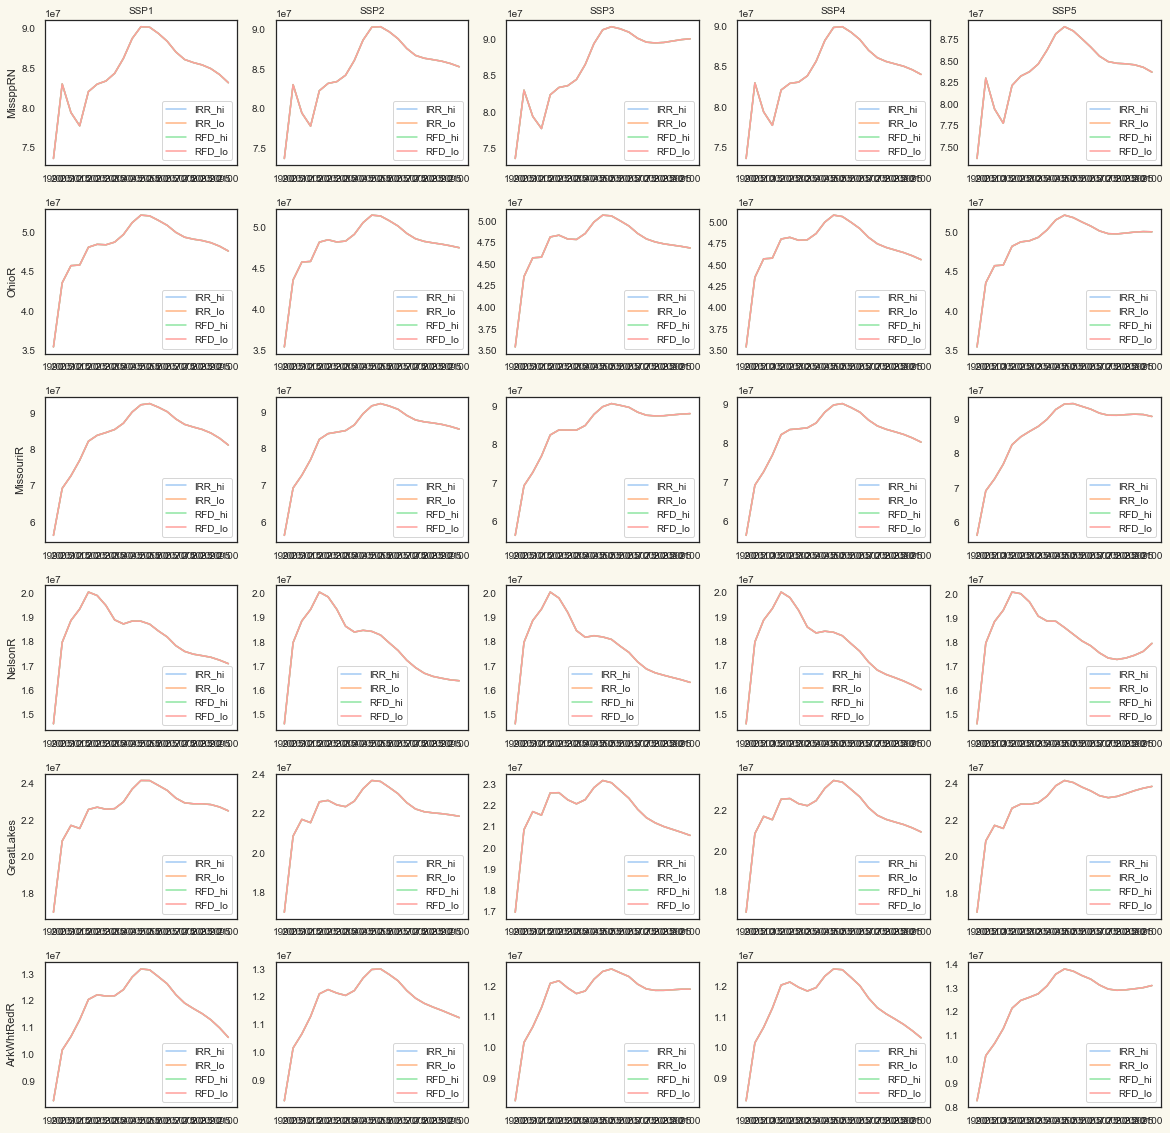

In [56]:
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df = land.query('scenario ==@scenario and subregion==@subregion')
                y = df.loc[:,Years[0]:Years[-1]].T*1e6
                #print(row,col,y)
                #print(df)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y, label=str(management)+'_'+str(level), ylabel=ylable, title=title)

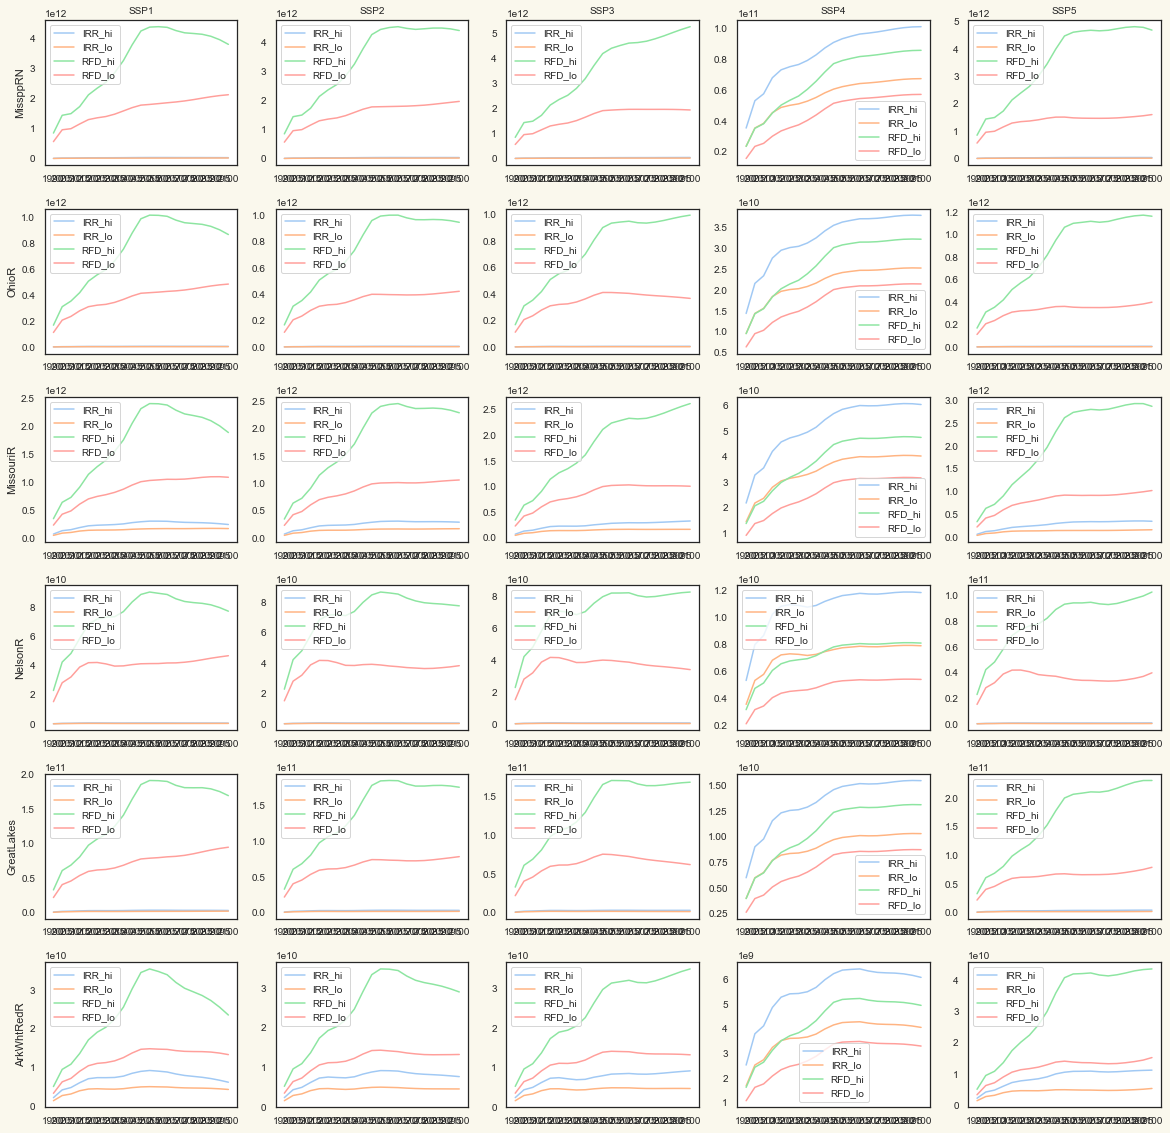

In [57]:
fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(6, 5, hspace=0.3)
#
for row, subregion in enumerate(subregions):
    for col, scenario in enumerate(Scenarios):
        ax = fig.add_subplot(gs[row,col])
        #print(row,col)
        for management in managements:
            for level in levels:
                df1 = production.query('management == @management and level ==@level and scenario ==@scenario and subregion==@subregion')
                df2 = land.query('scenario ==@scenario and subregion==@subregion')
                y1 = df1.loc[:,Years[0]:Years[-1]].T.to_numpy()*1e6
                y2 = df2.loc[:,Years[0]:Years[-1]].T.to_numpy()*1e3
                #print(row,col,y)
                #print(df)
                #print(y1,y2)
                if col%5==0:
                    ylable = str(subregion)
                else:
                    ylable = None
                if row == 0:
                    title = str(scenario)
                else:
                    title = None
                plot(ax, y1*y2, label=str(management)+'_'+str(level), ylabel=ylable, title=title)   